# <div class="alert alert-warning" style="background-color: #F7F6BA; color: #F7F6BA;"> <center><font color="F0D229">**Regressão LASSO**</font></center>

<center>Autoras: Luiza Davoli, Samarah L. M. Ramos e Sarah S. Silva</center>



<center>˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .</center>

## <font color="F0D229">**Introdução**</font>

O LASSO (também conhecido como regularização L1), é um acrônimo para *Least Absolute Shrinkage and Selection Operator*, ou Operador de Encolhimento Absoluto Mínimo e Seleção. Ele é um tipo de **regressão linear**, característico por adicionar um termo de penalidade à função objetivo de mínimos quadrados ordinários (OLS), que serve para prevenir que ocorra o overfitting e melhorar a precisão dos modelos estatísticos.

A regressão de LASSO realiza a regularização do tipo L1, ou seja, adiciona um fator da soma do valor absoluto dos coeficientes no objetivo de otimização. Esse fator é comumente chamado de penalidade. Essa penalidade ajuda a evitar problemas de multicolinearidade e overfitting nos conjuntos de dados. 

Ao reduzir coeficientes de regressão a zero, a regressão LASSO pode eliminar efetivamente variáveis independentes do modelo, contornando esses potenciais problemas no processo de modelagem.

Nesse notebook, seguiremos os seguintes passos:
1. Criando o modelo

    1.1 Sem normalização
   
    1.2 Com normalização
3. Visualização gráfica
4. Análise dos resultados

<center>˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .</center>

## <font color="F0D229">**1. Criando o modelo**</font>

O primeiro passo para a criação de um modelo de regressão LASSO é importar as bibliotecas e os módulos que serão utilizados em sua implantação. Nesse caso, temos as seguintes:

- **Pandas**: O pandas fornece rapidamente estruturas de dados flexíveis e expressivas, projetadas para tornar o trabalho com dados mais fácil e intuitivo.

- **Scikit learn**: O scikit-learn é uma biblioteca de aprendizado de máquina que possui tanto a opção de realizar aprendizado supervisionado, quanto não supervisionado. Ele também fornece ferramentas para diversas necessidades que podem surgir em projetos desse tipo, como ajuste de modelo, pré-processamento de dados, seleção de modelo, avaliação de modelo e muitos outros.

- **NumPy**: O NumPy é um pacote fundamental para computação científica. Ele possui ferramentas para trabalhar com matrizes comuns, multidimensionais ou mascaradas, realizando operações rápidas incluindo matemática, lógica, manipulação de formas, classificação, seleção, transformadas discretas de Fourier, álgebra linear básica, operações estatísticas básicas, simulação aleatória e muito mais.

- **Seaborn**: O Seaborn é uma biblioteca de visualização de dados Python baseada em matplotlib. Ele fornece uma interface de alto nível para desenho gráficos estatísticos atraentes e informativos.

Depois disso, é necessário importar os dados que constrituirão o Data Frame utilizado. Para isso, podemos utilizar uma das funcionalidades da biblioteca Pandas, citada acima, a `read_csv`, já que os dados estão armazenados em um arquivo .csv.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

# importando os dados
df = pd.read_csv("dados_tratados.csv")

Agora, precisamos separar os tipos diferentes de dados. Isso porque as funções de regressão linear do SciKit não reconhecem dados categóricos, sendo necessário transformá-los em numéricos. 

Para isso, criamos diferentes variáveis que armazenem esses tipos de dados, até que haja a conversão (chamadas de `numericos` e `categoricos`).

Depois da conversão, os dados já podem ser agrupados novamente (em uma variável que chamamos de `X`), a fim de realizarmos a previsão com o modelo.

In [2]:
# dados numéricos:
features_numericas = ["Age", 
                      "Avg_Daily_Usage_Hours", 
                      "Sleep_Hours_Per_Night", 
                      "Conflicts_Over_Social_Media", 
                      "Addicted_Score"]
# obtendo os valores da lista anterior
numericos = df[["Age", 
                "Avg_Daily_Usage_Hours", 
                "Sleep_Hours_Per_Night", 
                "Conflicts_Over_Social_Media", 
                "Addicted_Score"]].values

# dados categóricos:
features_categoricas = ["Academic_Level",
                "Gender",
                 "Country", 
                 "Most_Used_Platform",
                 "Affects_Academic_Performance",
                 "Relationship_Status"]
# obtendo os valores da lista anterior
categoricos = df[["Academic_Level",
                  "Gender",
                 "Country", 
                 "Most_Used_Platform",
                 "Affects_Academic_Performance",
                 "Relationship_Status"]].values
# target:
target = ["Mental_Health_Score"]

# conversão OneHot para transformar os dados categóricos
encoder = OneHotEncoder(sparse_output=False)
categ_encoded = encoder.fit_transform(categoricos)

# agrupando novamente os diferentes tipos de variáveis
X = np.hstack([numericos, categ_encoded])

# alterando o nome do target, para simplificar
y = ["Mental_Health_Score"]

Para realizar uma regressão Lasso, também é necessário separar os dados em conjuntos de treino e teste. Os dados de treino serão usados apenas para treinar o modelo e medir seu desempenho. Esses dados não serão utilizados como base para as predições. Já os dados de teste são os únicos utilizados na predição, a fim de ver se o modelo realmente entendeu os padrões gerais. Se essa divisão não for feita, se torna impossível saber se o modelo está realizando predições boas ou ruins, já que não existem dados externos para comparação e, no mundo real, queremos prever dados que nunca vimos antes. Nesse caso, a técnica utilizada para isso será a de dividir os dados a partir de seus índices individuais.

Primeiramente, a função `train_test_split` divide automaticamente os indices de treino e teste, a partir da proporção definida em `tamanho_teste`. Em seguida, criamos novas variáveis para armazenar separadamente as *features* que tenham o índice de treino e aquelas que tenham o índice de deste. O mesmo é feito para o *target*.

### <font color="F0D229">**1.1 Com normalização**</font>

O último passo antes da aplicação do modelo de regressão em si, é normalizar os dados. No Data Set utilizado, existem dados com escalas e unidades de medida variadas, dificultando a interpretação correta por parte da máquina. Em um exemplo bem simples, podemos dizer que o modelo provavelmente daria uma importância muito maior  aos dados que indicam idades, pois seus valores estão entre 18 e 24. Isso pareceria muito menos importante que os dados armazenados que dizem á respeito das horas de uso das redes sociais, que possuem valores entre 1.5 e 8.0 horas. A máquina não possui a mesma intuição humana para entender que o tempo de uso de uma rede social é muito mais valioso para a nossa análise do que a idade do usuário. 

O normalizador escolhido para esse caso é o **Standard Scaler** (normalizador padrão), que transforma a média dos dados em 0 e o seu desvio padrão em 1. Fazendo isso, conseguimos definir uma escala única para todos os dados, mantendo sua distribuição original.

In [3]:
# quantidade de dados do DataFrame que serão utilizados no teste (em decimal)
tamanho_teste = 0.3

# separando os índices
indices = df.index
indices_treino, indices_teste = train_test_split(indices, test_size=tamanho_teste)

# dividindo os dados com base no índice
X_treino = X[indices_treino]
X_teste = X[indices_teste]
y_treino = df.loc[indices_treino, y].values.ravel()
y_teste = df.loc[indices_teste, y].values.ravel()


# Aplicação do normalizador
normalizador = StandardScaler()
X_treino_normalizado = normalizador.fit_transform(X_treino)
X_teste_normalizado = normalizador.transform(X_teste)

Por fim, resta apenas definir o único hiperparâmetro que o modelo possui e aplicá-lo aos dados de treino. 

O hiperparâmetro lambda (escrito como alpha no código, para que não haja interferência com a função lamda do prórpio python) é crucial para a regressão LASSO e é o que controla a força da penalidade. Esse hiperparâmetro equilibra a proporção entre o viés e a variância nos coeficientes resultantes da previsão. 
- À medida que λ aumenta, o viés aumenta e a variância diminui, levando a um modelo mais simples com menos parâmetros;
- À medida que λ diminui, a variância aumenta, levando a um modelo mais complexo com mais parâmetros;
- Se λ for zero, a função se torna OLS, ou seja, um modelo de regressão linear padrão sem qualquer regularização.

In [24]:
# definindo o valor do hiperparâmetro
lasso_modelo = Lasso(alpha=0.01)

# aplicando o hiperparâmetro aos dados de treino
lasso_modelo.fit(X_treino_normalizado, y_treino)

# fazendo a predição com os dados de teste
y_previsto = lasso_modelo.predict(X_teste_normalizado)

### <font color="F0D229">**1.2 Sem normalização**</font>

Para fins de comparação, farei também uma previsão, utilizando o mesmo modelo, sem realizar a normalização dos dados. Como todas as variáveis necessárias já estão definidas, é possível seguir a partir do código utilizado para aplicar o modelo de previsão aos dados, alterando apenas o tipo de dados que serão utilizados (em vez de `X_teste_normalizado`, usamos `X_teste`).

In [27]:
# aplicando o hiperparâmetro aos dados de treino
lasso_modelo.fit(X_treino, y_treino)

# fazendo a predição com os dados de teste
y_previsto02 = lasso_modelo.predict(X_teste)

Na próxima célula, será criado apenas um pequeno código para exibir os parâmetros definidos pelo modelo LASSO como os mais relevantes para a previsão. Eles servem tanto para a previsão normalizada, quanto a não normalizada.

In [25]:
# lista com o nome das features
feature_names = []
# adicionando as features numéricas
feature_names.extend(features_numericas)
# aplicando o One Hot novamente, mas na lista de nomes
cat_encoded_names = encoder.get_feature_names_out(features_categoricas)
# adicionando as features categóricas
feature_names.extend(cat_encoded_names)

# criando uma lista com os atributos selecionados 
selected_features = []
for i, coef in enumerate(lasso_modelo.coef_):
    if abs(coef) > 1e-4:
        selected_features.append(feature_names[i])

print(f"Atributos selecionados pelo LASSO: ({len(selected_features)} features):")
for feature in selected_features:
    print(f"  - {feature}")

Atributos selecionados pelo LASSO: (51 features):
  - Avg_Daily_Usage_Hours
  - Conflicts_Over_Social_Media
  - Addicted_Score
  - Academic_Level_High School
  - Gender_Female
  - Country_Afghanistan
  - Country_Armenia
  - Country_Australia
  - Country_Bangladesh
  - Country_Brazil
  - Country_Canada
  - Country_Czech Republic
  - Country_Ecuador
  - Country_Egypt
  - Country_Finland
  - Country_France
  - Country_Greece
  - Country_India
  - Country_Ireland
  - Country_Israel
  - Country_Italy
  - Country_Kyrgyzstan
  - Country_Lebanon
  - Country_Liechtenstein
  - Country_Lithuania
  - Country_Malaysia
  - Country_Maldives
  - Country_Mexico
  - Country_Montenegro
  - Country_Nepal
  - Country_Netherlands
  - Country_New Zealand
  - Country_North Macedonia
  - Country_Pakistan
  - Country_Peru
  - Country_Poland
  - Country_Portugal
  - Country_Romania
  - Country_Russia
  - Country_Serbia
  - Country_Slovakia
  - Country_South Korea
  - Country_Sweden
  - Country_Switzerland
  - Co

<center>˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .</center>

## <font color="F0D229">**2. Visualização gráfica**</font>

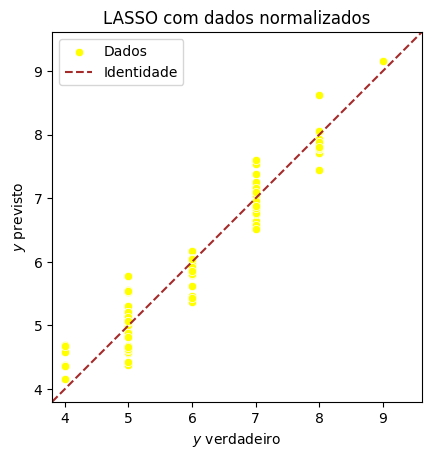

In [30]:
# definindo os valores máximos e mínimos dos eixos do gráfico
min_val = min(y_teste.min(), y_previsto.min())
max_val = max(y_teste.max(), y_previsto.max())
intervalo = [min_val * 0.95, max_val * 1.05]

# plotando o gráfico
eixo = sns.scatterplot(x=y_teste, y=y_previsto, label="Dados", color="yellow")
eixo.plot(intervalo, intervalo, "--", label="Identidade", color="brown")
eixo.set(
    xlabel="$y$ verdadeiro",
    ylabel="$y$ previsto",
    xlim=intervalo,
    ylim=intervalo,
    aspect="equal",
)
eixo.set_title("LASSO com dados normalizados")
eixo.legend();

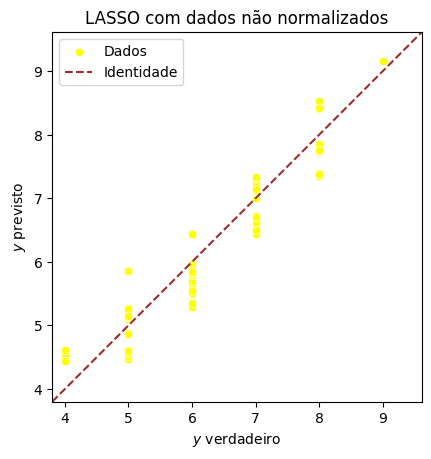

In [31]:
# definindo os valores máximos e mínimos dos eixos do gráfico
min_val = min(y_teste.min(), y_previsto02.min())
max_val = max(y_teste.max(), y_previsto02.max())
intervalo = [min_val * 0.95, max_val * 1.05]

# plotando o gráfico
eixo = sns.scatterplot(x=y_teste, y=y_previsto02, label="Dados", color="yellow")
eixo.plot(intervalo, intervalo, "--", label="Identidade", color="brown")
eixo.set(
    xlabel="$y$ verdadeiro",
    ylabel="$y$ previsto",
    xlim=intervalo,
    ylim=intervalo,
    aspect="equal",
)
eixo.set_title("LASSO com dados não normalizados")
eixo.legend();

<center>˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .</center>

## <font color="F0D229">**3. Análise dos resultados**</font>

RMSE (Root Mean Squared Error ou Raiz Quadrada da Média das Diferenças Quadráticas) é uma métrica amplamente usada que indica o grau de erro das previsões, em média.

Um RMSE menor indica que os erros de previsão são menores, ou seja, as previsões são mais precisas. Não há um valor absoluto que indica se o valor do RMSE será bom ou não. Essa conclusão deve ser tirada a partir de comparações entre diferentes modelos usados para previsões com os mesmos dados.

Nesse caso, podemos comparar o modelo que foi testado com dados normalizados e o que foi treinado sem normalização dos dados. A tendência é que o RMSE do primeiro m

In [32]:
rmse01 = root_mean_squared_error(y_teste, y_previsto)

print(f"Root Mean Squared Error (RMSE) com dados normalizados: {rmse01:.4f}")


rmse02 = root_mean_squared_error(y_teste, y_previsto02)

print(f"Root Mean Squared Error (RMSE) com dados não normalizados: {rmse02:.4f}")

Root Mean Squared Error (RMSE) com dados normalizados: 0.2568
Root Mean Squared Error (RMSE) com dados não normalizados: 0.3182


Além da eficiência do modelo, é importante checar se há ou não há vazamento dos dados entre treino e teste. Se existem dados iguais (redundantes) em conjuntos diferentes, dizemos que houve vazamento, já que o modelo não está sendo testado com dados 100% novos.

Podemos verificar se houve vazamento da seguinte forma:

In [21]:
# verificação de vazamento dos dados


# tamanho do dataset:
T_df = len(df)

# tamanho do treino:
T_treino = len(X_treino_normalizado)

# tamanho do teste:
T_teste = len(X_teste_normalizado)

# condição de vazamento: T_teste+T_treino != T_df

if T_teste + T_treino == T_df:
    print("Não houve vazamento de dados, pois a soma dos dados de treino e teste possui o mesmo tamanho do dataset")

else:
    print("Houve vazamento de dados")

Não houve vazamento de dados, pois a soma dos dados de treino e teste possui o mesmo tamanho do dataset


<center>˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .</center>

## <font color="F0D229">**Referências**</font>

NUMPY. **Overview — NumPy v1.19 Manual**. Disponível em: <https://numpy.org/doc/stable/>.

SCIKIT-LEARN. **User guide: contents — scikit-learn 0.22.1 documentation.** Disponível em: <https://scikit-learn.org/stable/user_guide.html>.

THE PANDAS DEVELOPMENT TEAM. **Package overview — pandas 1.1.5 documentation.** Disponível em: <https://pandas.pydata.org/docs/getting_started/overview.html>.

‌SEABORN. **seaborn: statistical data visualization — seaborn 0.9.0 documentation.** Disponível em: <https://seaborn.pydata.org/>.‌

<center>˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .</center>